# Quantum Communication
Quantum communication is a field of study that leverages the unique principles of quantum mechanics to enable secure and efficient transmission of information. At the core of quantum communication are phenomena like quantum teleportation and superdense coding, which promise to revolutionize how information is shared.

In [42]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

## Quantum Teleportation
Quantum teleportation is a process by which the quantum state of a particle (e.g., a qubit) is transferred from one location to another without physically moving the particle itself. This process relies on the phenomenon of quantum entanglement and classical communication, and it is a fundamental protocol in quantum information science.

Counts: {'101': 262, '100': 248, '110': 272, '111': 242}


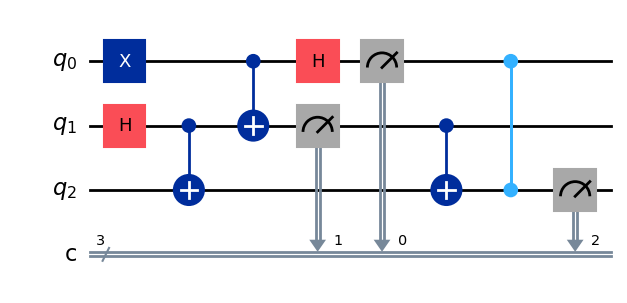

In [58]:
# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Create an entangled pair between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

# Step 2: Prepare qubit 0 in the state to be teleported
qc.x(0)

# Step 3: Perform Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Step 4: Apply conditional operations based on the measurement outcomes
qc.cx(1, 2)
qc.cz(0, 2)

# Measure the teleported qubit
qc.measure(2, 2)

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# Get the counts of outcomes
counts = result.get_counts()
print("Counts:", counts)

# Draw the circuit
qc.draw('mpl') 

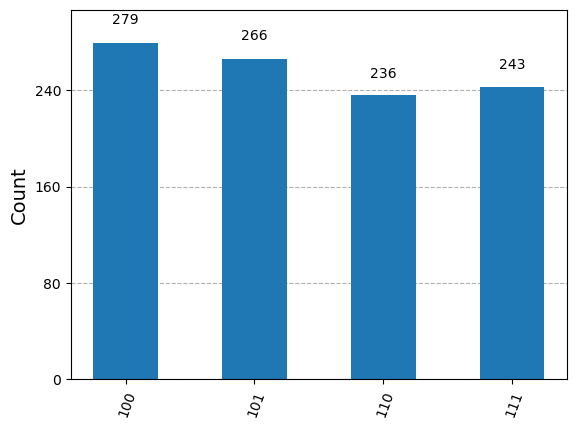

In [56]:
# Visualize the results
plot_histogram(counts)
plt.show()

# Superdense Coding
This is a communication protocol that allows two bits of classical information to be sent using just one qubit, leveraging the entanglement between Alice and Bob. It requires them to share an entangled pair beforehand and use quantum operations to encode the extra information.

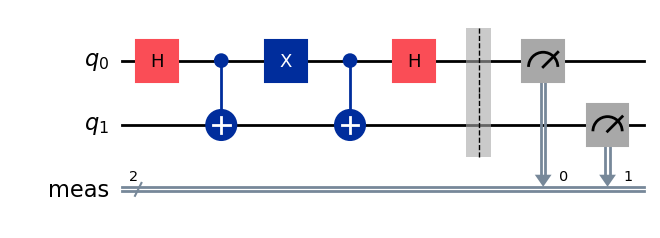

In [60]:
# Step 1: Create a 2-qubit Quantum Circuit
qsd = QuantumCircuit(2)

# Step 2: Entangle the qubits
qsd.h(0)          # Apply a Hadamard gate on qubit 0
qsd.cx(0, 1)      # Apply a CNOT gate with qubit 0 as control and qubit 1 as target

# Step 3: Encode the message (classical bits 01 as an example)
qsd.x(0)          # Apply X gate on qubit 0 to encode '01'

# Step 4: Send qubit 0 to the receiver (this is conceptual in code)

# Step 5: Decode the message
qsd.cx(0, 1)      # Apply CNOT gate with qubit 0 as control and qubit 1 as target
qsd.h(0)          # Apply Hadamard gate on qubit 0

# Step 6: Measure both qubits
qsd.measure_all()

# Execute the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# Draw the circuit
qsd.draw('mpl')

Counts: {'100': 263, '101': 266, '111': 255, '110': 240}


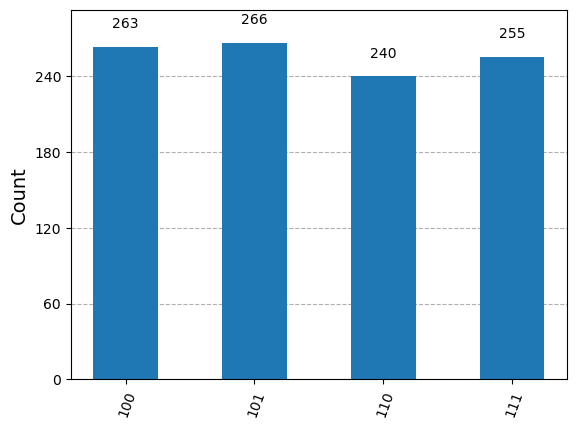

In [48]:
# Plot the results
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)